<a href="https://colab.research.google.com/github/hail-members/pattern-recognition-machine-learning/blob/main/2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이게 인종차별적인 데이터를 포함하고 있다는 이유로 이후 버전에서는 삭제되었습니다.

In [1]:
!pip install scikit-learn==1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [2]:
# import required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


우리가 수업시간에 봤던 예시와 유사하게 이번엔 보스턴 집값에 대해서

In [3]:
# 보스턴 주택 가격 데이터 로드
boston = load_boston()
X_boston = boston.data
y_boston = boston.target

# 데이터 설명 출력
# print(boston.DESCR[:760])  # 데이터셋 설명의 일부 출력
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
X_boston.shape

(506, 13)

데이터 크기를 보면 13개의 feature를 갖고 있는 데이터인데.. 실제로 우리는 모델을 학습시켜서 뭘 하고 싶나요?

회귀 모델을 학습 시켜서 새로운 데이터가 온다면 그 데이터를 기반으로 예측을 하는게 목표입니다.

이때 학습에 쓰이는 건 training 데이터, 새롭게 들어와서 우리가 에측을 하기 위한 데이터를 test 데이터라고 부릅니다.

이를 자동으로 나누기 위해서 sklearn의 train_test_split 함수를 이용합니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 만약 feature 가 한 개 라면?




In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_boston[:,0], y_boston, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (404, 1)
X_test (102, 1)


In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에 대한 모델 성능 평가
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

train_score, test_score


(0.14446921351610564, 0.15872146782902874)

In [7]:
lin_reg.coef_.shape

(1,)

하나 적지 않나?

$y=\theta_0 + \theta_1 \cdot x_1$ 인데...

여기서 `lin_reg.coef_` 는 $\theta_1$, $\theta_0$ 를 얻고 싶다면 `lin_reg.intercept_`를 써야함

In [8]:
print('coef', lin_reg.coef_)
print('intercept', lin_reg.intercept_)

coef [-0.39966675]
intercept 24.238981774011265


Text(0, 0.5, 'y_train')

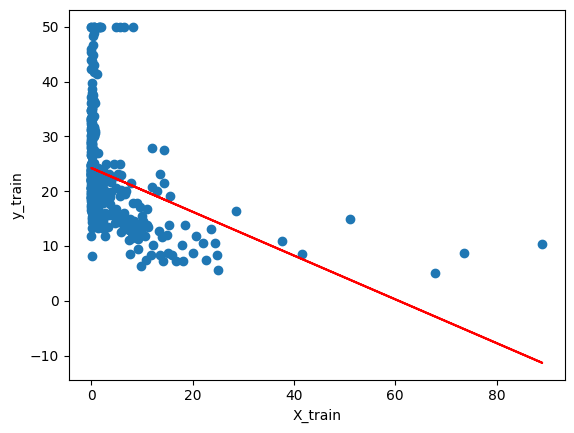

In [9]:
%matplotlib inline

# Plot the training data
plt.scatter(X_train, y_train, label="Training data")

# Plot the fitted line
plt.plot(X_train, lin_reg.predict(X_train), color="red", label="Fitted line")

# Add labels and title
plt.xlabel("X_train")
plt.ylabel("y_train")

# 모든 feature 를 사용하는 경우.

In [10]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (404, 13)
X_test (102, 13)


In [11]:
# 선형 회귀 모델 훈련
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에 대한 모델 성능 평가
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

train_score, test_score


(0.7508856358979673, 0.6687594935356325)

In [12]:
lin_reg.coef_.shape

(13,)

앞에서 말한것처럼 intercept 는 별도로 추출해야

In [13]:
lin_reg.intercept_

30.246750993923776